# NEURO-105: Project
## Mouse Cognition Study

**Course:** MSc in Neurosciences, University of Crete  
**Instructor:** Alexandros Pittis

---

## Overview

We will analyze data from a **mouse cognition study** that examined how different factors affect cognitive performance.

### Dataset

**120 mice** from **8 strains** (A-H) were tested on cognitive tasks. For each mouse, we have:

**Behavioral tests** (scores 0-100):
- `maze_test` - Spatial memory (navigating a maze)
- `object_recognition` - Remembering familiar objects
- `fear_conditioning` - Learning from negative stimuli
- `social_memory` - Recognizing other mice

**Gene expression** (arbitrary units):
- `BDNF` - Brain-derived neurotrophic factor
- `CREB1` - Memory consolidation
- `DRD2` - Dopamine receptor
- `GRIN1` - Glutamate receptor

**Environmental/physical factors:**
- `diet` - "standard", "high_fat", or "enriched"
- `daylight` - Hours of light per day (8, 12, or 16)
- `exercise_wheel` - Access to running wheel ("yes" or "no")
- `age_weeks` - Age in weeks
- `weight_g` - Body weight in grams

---

## Loading the Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [6]:
# Load the dataset
infile = "https://raw.githubusercontent.com/cgenomicslab/Courses/refs/heads/main/MScNeuro/2026/data/mouse_cognition.csv"
#infile = "/Users/alxndrs/Documents/courses/Courses/MScNeuro/2026/data/mouse_cognition.csv"
mice = pd.read_csv(infile)

mice.head(30)

,mouse_id,strain,maze_test,object_recognition,fear_conditioning,social_memory,BDNF,CREB1,DRD2,GRIN1,diet,light_hours,exercise_wheel,age_weeks,weight_g
0,M001,A,78,72,65,70,8.2,6.5,5.8,7.1,standard,12,yes,12,28.5
1,M002,A,82,75,68,73,8.5,6.8,5.6,7.4,standard,12,yes,14,29.2
2,M003,A,75,70,62,68,7.9,6.3,5.9,6.9,standard,12,no,11,27.8
3,M004,A,80,74,66,71,8.3,6.6,5.7,7.2,enriched,12,yes,13,28.1
4,M005,A,77,71,64,69,8.1,6.4,5.8,7.0,standard,12,no,12,28.9
5,M006,A,83,76,69,74,8.6,6.9,5.5,7.5,enriched,12,yes,15,29.5
6,M007,A,76,69,63,67,7.8,6.2,6.0,6.8,high_fat,12,no,10,30.2
7,M008,A,79,73,65,70,8.2,6.5,5.7,7.1,standard,12,yes,13,28.4
8,M009,A,81,74,67,72,8.4,6.7,5.6,7.3,enriched,12,yes,14,28.8
9,M010,A,74,68,61,66,7.7,6.1,6.1,6.7,high_fat,12,no,11,31.1


In [7]:
# Dataset overview
print("Shape:", mice.shape)
print("\nColumns:", list(mice.columns))

Shape: (120, 15)

Columns: ['mouse_id', 'strain', 'maze_test', 'object_recognition', 'fear_conditioning', 'social_memory', 'BDNF', 'CREB1', 'DRD2', 'GRIN1', 'diet', 'light_hours', 'exercise_wheel', 'age_weeks', 'weight_g']


In [8]:
# Mice per strain
mice['strain'].value_counts()#.sort_index()

strain
A    15
B    15
C    15
D    15
E    15
F    15
G    15
H    15
Name: count, dtype: int64

In [9]:
# Summary statistics
mice.describe()

,maze_test,object_recognition,fear_conditioning,social_memory,BDNF,CREB1,DRD2,GRIN1,light_hours,age_weeks,weight_g
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,69.833333,70.550000,68.658333,70.408333,7.262500,6.740833,6.325000,7.153333,12.000000,12.466667,28.984167
std,9.484471,6.900067,8.486763,8.064338,1.009373,0.831168,0.673914,0.842558,2.008386,1.549916,2.043477
min,50.000000,53.000000,50.000000,55.000000,5.300000,5.000000,4.700000,5.500000,8.000000,10.000000,25.300000
25%,63.000000,66.750000,63.000000,65.000000,6.500000,6.100000,5.800000,6.575000,12.000000,11.000000,27.275000
50%,69.500000,71.000000,69.000000,70.000000,7.200000,6.750000,6.400000,7.100000,12.000000,12.000000,28.750000
75%,76.000000,75.000000,74.000000,75.000000,7.900000,7.400000,6.800000,7.625000,12.000000,14.000000,30.525000
max,91.000000,86.000000,88.000000,91.000000,9.600000,8.400000,7.600000,9.100000,16.000000,15.000000,34.100000


In [10]:
# Check categorical variables
print("Diets:", mice['diet'].unique())
print("Light hours:", mice['light_hours'].unique())
print("Exercise wheel:", mice['exercise_wheel'].unique())

Diets: ['standard' 'enriched' 'high_fat']
Light hours: [12 16  8]
Exercise wheel: ['yes' 'no']


---

## Strain-specific Characteristics

Each strain has different cognitive strengths:

In [13]:
# Mean scores per strain
strain_means = mice.groupby('strain')[['maze_test', 'object_recognition', 
                                        'fear_conditioning', 'social_memory']].mean().round(1)
strain_means

,maze_test,object_recognition,fear_conditioning,social_memory
strain,,,,
A,78.7,72.2,65.1,70.1
B,65.8,80.6,70.6,62.6
C,55.8,58.6,82.6,75.6
D,70.6,70.6,70.6,70.6
E,85.8,65.6,55.6,60.6
F,60.8,75.6,75.6,85.6
G,72.6,68.6,60.6,65.6
H,68.6,72.6,68.6,72.6


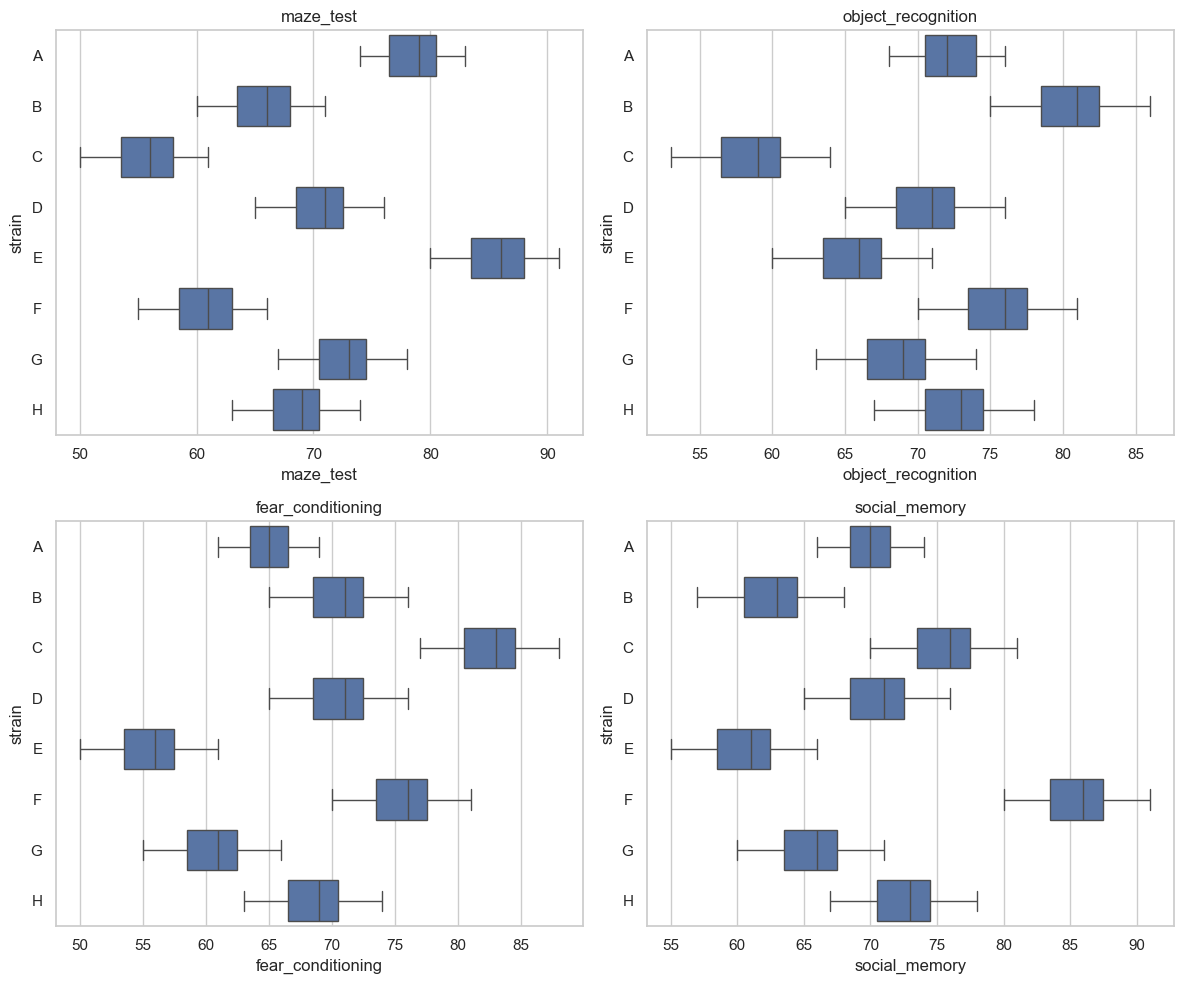

In [14]:
# Visualize strain differences
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

tests = ['maze_test', 'object_recognition', 'fear_conditioning', 'social_memory']

for i, test in enumerate(tests):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=mice, x=test, y='strain', ax=ax)
    ax.set_title(test)

plt.tight_layout()
plt.show()

---

## Assignment

Each one will be assigned **one specific question** from the list below.

### Project Requirements

Your analysis should include:

1. **Data exploration** - Load data, filter if needed, show relevant summary statistics
2. **Visualization** - One plot showing your main finding
3. **Statistical test** - t-test, Mann-Whitney, or correlation
4. **Interpretation** - What does your result mean biologically?

### Submit

1. **Jupyter notebook** (`.ipynb`) with your analysis
2. **One slide** summarizing result

---

## Questions

| # | Question | Variables |
|---------|----------|-----------|
| 1 | Is strain A better at maze navigation than strain B? | maze_test, strain | 
| 2 | Is strain C better at fear conditioning than strain D? | fear_conditioning, strain |
| 3 | Does BDNF expression correlate with maze test performance? | BDNF, maze_test | 
| 4 | Does GRIN1 expression correlate with social memory? | GRIN1, social_memory | 
| 5 | Do mice with exercise wheels perform better on object recognition? | exercise_wheel, object_recognition | 
| 6 | Does diet affect fear conditioning? (standard vs high_fat) | diet, fear_conditioning |
| 7 | Is strain E better at maze tests than strain G? | maze_test, strain |
| 8 | Does CREB1 expression correlate with object recognition? | CREB1, object_recognition |
| 9 | Do mice with more light hours perform better on maze tests? | light_hours, maze_test |
| 10 | Does age affect object recognition performance? | age_weeks, object_recognition |

---

## Instructions

1. Complete your analysis in a Jupyter notebook
2. Name your file: `Project_YourName.ipynb`
3. Upload to the shared google drive folder: *(https://drive.google.com/drive/folders/17_MZtL5eAGIpSjhOhwkIgMBm6kCo6B2P?usp=sharing)*
4. Prepare ONE summary slide

---

*NEURO-105 - MSc in Neurosciences, University of Crete*